In [ ]:
### Analysis of Sales Data 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
all_data = pd.read_csv('all_data.csv')

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data['Month']=2

In [5]:
all_data['Month']= all_data["Order Date"].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [6]:
### Clean up the data remove NaN


In [7]:
nan_df = all_data[all_data.isna().any(axis=1)] ## To display rows of NaN values
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
temp_df = all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [10]:
df= pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files= [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df= pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
all_months_data.to_csv("all_data.csv",index=False)

In [12]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [13]:
## What was the best month for sales? how much was earned that month?
## add a sales column

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
 all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
 all_data.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
results = all_data.groupby('Month').sum()

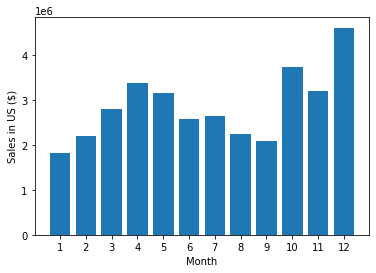

In [17]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in US ($)')
plt.xlabel('Month')
plt.show()

In [18]:
## What city has higher number of sales??

In [19]:
all_data["City"] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1] )
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


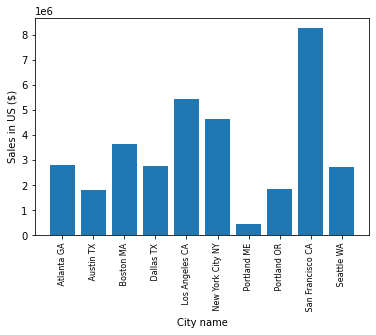

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


In [20]:
city_results = all_data.groupby('City').sum()
##cities = all_data['City'].unique()
cities=[city for city,df in all_data.groupby('City')]
plt.bar(cities,city_results['Sales'])
plt.xticks(cities,rotation ='vertical',size=8)
plt.ylabel('Sales in US ($)')
plt.xlabel('City name')
plt.show()
city_results

In [21]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [ ]:
all_data.head()

In [22]:
### What time should we display the advertisment to maximize likelihood of customers burying product??


In [27]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']= all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


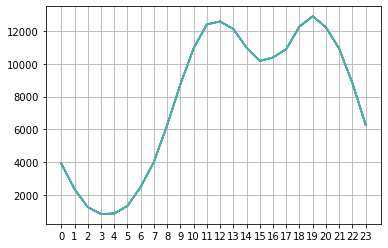

In [32]:
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()
plt.show()
## My recommendation is around 11am or 7pm(19)

In [33]:
## what products are most often sold together.?

In [34]:
df =all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

<ipython-input-34-a428effdc8e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [36]:
## remove duplicate values again for proper understanding
df= df[['Order ID','Grouped']].drop_duplicates()
df.head(100)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [38]:
from itertools import combinations
from collections import Counter

In [44]:
count = Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [45]:
## what product was sold the most?? why do you think?

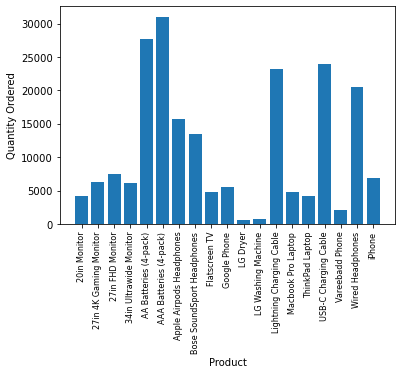

In [51]:
produt_group = all_data.groupby('Product')
produt_group.sum().head()
quantity_ordered = produt_group.sum()['Quantity Ordered']
products = [product for product,df in produt_group]
plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

<ipython-input-54-39ed01e0b218>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size =8)


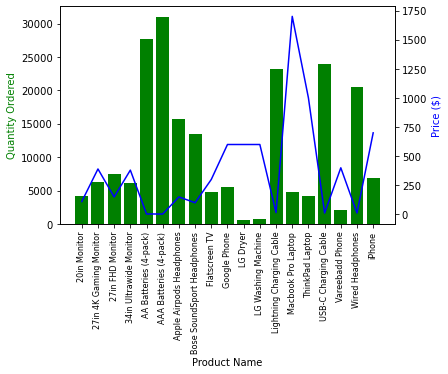

In [54]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size =8)
plt.show()